# Univariate Linear Regression using SKLearn

Import required packages

In [0]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Read and Profile the data

age : False
sex : False
bmi : False
children : False
smoker : False
region : False
charges : False


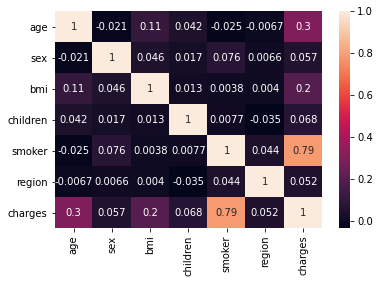

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,2,33.770,1,0,2,1725.55230
2,28,2,33.000,3,0,2,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,2,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [26]:
data = pd.read_csv("insurance.csv")
for i in data:
    print(i, ":", data[i].isna().values.any())
corr_matrix = data.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()
data

Prepare the data for training

In [0]:
X = data[["smoker"]]
Y = data["charges"]
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2)

Train the data using LinearRegression()

In [28]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)
print("theta 0  : ", LRM.intercept_)
print("theta 1  : ", LRM.coef_)
print("R2 Score : ", r2_score(YTest, prediction))
print("Error    : ", mean_squared_error(YTest, prediction))


theta 0  :  8654.445828677683
theta 1  :  [23887.22450742]
R2 Score :  0.6149626099571366
Error    :  46668771.66079372


# Multivariate Linear Regression using SKLearn

Prepare the data for training

In [0]:
X = data[["age", "bmi", "smoker"]]
Y = data["charges"]
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2)

Train the data using LinearRegression()

In [30]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)
print("theta 0    : ", LRM.intercept_)
print("theta 1-3  : ", LRM.coef_)
print("R2 Score   : ", r2_score(YTest, prediction))
print("Error      : ", mean_squared_error(YTest, prediction))

theta 0    :  -12317.618583790616
theta 1-3  :  [  259.220069     345.03372466 23754.80282301]
R2 Score   :  0.7311848278653346
Error      :  35126390.59751844


# Univariate Linear Regression Model using Numpy

The code are mostly derived from Prof. Andrew Ng. Machine Learning Course.
Import required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Read the data

In [0]:
data = pd.read_csv("insurance.csv")

Cost Function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)})^2}$$
$$h_{\theta}(x) = \theta^T x = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

In [0]:
def costFunction(X, Y, theta):
    h = np.dot(X, theta) - Y
    J = np.dot(h, h) / (2 * X.shape[0])
    return J

Train data with $$\theta_{0} = 0, \theta_{1} = 0$$  also to make it easier to be processed the linear regression formula should be : $$h_{\theta}(x) = \theta^T x = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$, where $$X_0 = 1$$

In [34]:
X = data[["smoker"]]
Y = data["charges"]
XTrain = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0])
print(costFunction(XTrain, Y, theta)) 

161323436.79435238


Train data with $$\theta_{0} = 8294, \theta_{1} = 23883$$ 

In [35]:
XTrain = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([8294, 23883])
print(costFunction(XTrain, Y, theta)) 

27869826.450211935


Gradient Descent 

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}{(h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_j}$$

In [0]:
def gradientDescent(X, Y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / X.shape[0]) * np.dot(X.T, (np.dot(X, theta) - Y)))   
        J_history[i] = costFunction(X, Y, theta)
    return theta, J_history

Plot the cost function results on training process

In [0]:
def plotCost():
    plt.figure()
    plt.plot(np.arange(num_iters), J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

Train data with gradient descent as the optimiser to find the best $\theta_j$

[10638.07428519 14225.26412534]


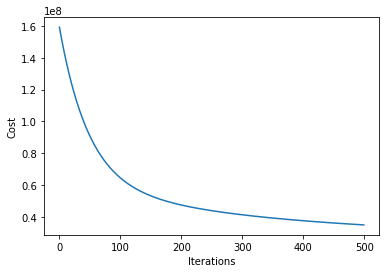

In [38]:
XTrain = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0])
alpha = 0.01
num_iters = 500
theta, J_history = gradientDescent(XTrain, Y, theta, alpha, num_iters)
print(theta)
plotCost()

Predict the charges for new data

In [39]:
nonSmoker = theta[0] + 0 * theta[1]
smoker = theta[0] + 1 * theta[1]

print("Smoker fee     : %.2f" % smoker)
print("Non Smoker fee : %.2f" % nonSmoker)


Smoker fee     : 24863.34
Non Smoker fee : 10638.07


# Multivariate Linear Regression Model using Numpy

Feature Normalisation

$$ X_{i} := \frac{X_{i} - \mu_{i}}{\sigma_{i}} $$

In [0]:
def featureNormalisation(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X)
    XNorm = (X - mu) / sigma
    return XNorm, mu, sigma

Prepare and train data with gradient descent as the optimiser to find the best $\theta_j$

[13183.22918068  3616.15456526  1969.16683202  9547.56162944]


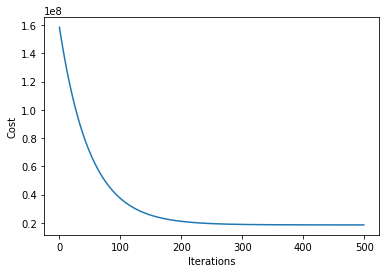

In [41]:
X = data[["age", "bmi", "smoker"]]
Y = data["charges"]
XTrain, mu, sigma = featureNormalisation(X)
XTrain = np.hstack((np.ones((XTrain.shape[0], 1)), XTrain))
theta = np.zeros(4)
alpha = 0.01
num_iters = 500
theta, J_history = gradientDescent(XTrain, Y, theta, alpha, num_iters)
print(theta)
plotCost()

Predict the charges for new data

In [42]:
age = [18, 20, 50, 50]
bmi = [30, 30, 25, 25]
smoker = [1, 1, 0, 1]
charges = np.zeros(4)
print(len(age))
for i in range(len(age)):
    age[0] = (age[0] - mu[0]) / sigma[0]
    bmi[i] = (bmi[i] - mu[1]) / sigma[1]
    smoker[i] = (smoker[i] - mu[2]) / sigma[2]
    charges[i] = theta[0] + theta[1] * age[i] + theta[2] * bmi[i] + theta[3] * smoker[i]
    print("Charges for person ", i + 1 , "is %.2f" % charges[i])

4
Charges for person  1 is 26322.96
Charges for person  2 is 104106.32
Charges for person  3 is 187316.47
Charges for person  4 is 210975.80


Playing with different learning rate

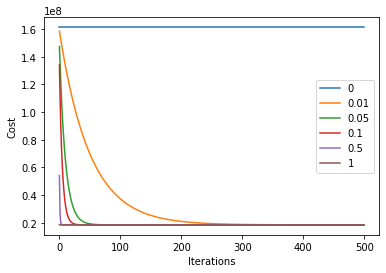

In [43]:
alphas = [0, 0.01, 0.05, 0.1, 0.5, 1]
plt.figure()
for alpha in alphas:
    theta = np.zeros(4)
    num_iters = 500
    theta, J_history = gradientDescent(XTrain, Y, theta, alpha, num_iters)
    plt.plot(np.arange(num_iters), J_history, label=str(alpha))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()